## Feature Scoring and Dimensional Stacking

In addition to Global Sensitivity Analysis, this notebook aims to provide a better understanding of uncertainties and their potential impact on the outcomes of the IJssel River simulation model. We utilize Feature Scoring to quantify the degree of correlation between each uncertainty and outcomes. Additionally, we employ Dimensional Stacking to visualize how uncertainties' responses vary in the high-dimensional parameter space.

In [47]:
# Import all the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring, dimensional_stacking
from problem_formulation import get_model_for_problem_formulation

First, we upload the file with the **base case scenario** of 10,000 scenario runs. This is based on the problem_formulation called 'All Dikes'.

In [2]:
results = load_results('./output/results_base_case.tar.gz')

In [3]:
experiments, outcomes = results

Since it is the base case scenario, the policy levers will be equal to zero. Therefore we drop the columns of the policy levers.

In [4]:
model, steps = get_model_for_problem_formulation('All Dikes')
levers = [L.name for L in model.levers]
experiments = experiments.drop(columns=levers)

In [5]:
#Visualisation of the dataframe of the experiments
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,scenario,policy,model
0,27,109.980421,10.0,0.949842,113.333813,10.0,0.987398,102.837734,1.0,0.371209,...,0.263337,316.684365,1.0,0.999562,4.5,3.5,4.5,0,Base Case,dikesnet
1,69,167.755342,1.5,0.095852,258.851784,10.0,0.234429,239.613433,10.0,0.182672,...,0.814936,102.802209,1.5,0.595520,2.5,1.5,1.5,1,Base Case,dikesnet
2,71,121.808348,1.5,0.017500,339.112507,10.0,0.848583,79.000247,1.5,0.224383,...,0.546810,178.238924,10.0,0.375477,1.5,2.5,4.5,2,Base Case,dikesnet
3,6,55.474135,10.0,0.314805,108.932171,1.0,0.164041,254.582802,1.0,0.056785,...,0.217685,220.167812,10.0,0.682489,2.5,4.5,4.5,3,Base Case,dikesnet
4,55,151.181600,10.0,0.973067,247.770981,1.0,0.642211,203.340595,1.5,0.985939,...,0.318672,256.017115,10.0,0.503885,2.5,3.5,1.5,4,Base Case,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,42.645512,1.0,0.933940,171.755089,10.0,0.628981,329.265658,1.0,0.595740,...,0.529506,306.105846,1.0,0.812787,3.5,4.5,1.5,9995,Base Case,dikesnet
9996,18,187.300092,10.0,0.619700,40.813056,1.0,0.983366,222.099153,1.0,0.858861,...,0.845028,204.392312,1.0,0.245976,2.5,3.5,3.5,9996,Base Case,dikesnet
9997,39,41.257997,1.0,0.868851,244.213881,1.5,0.097094,287.946300,1.5,0.424259,...,0.220211,166.195416,1.0,0.433348,2.5,3.5,4.5,9997,Base Case,dikesnet
9998,52,113.805633,1.0,0.944455,305.525481,10.0,0.217964,157.491692,1.0,0.128111,...,0.386190,309.914539,10.0,0.172637,3.5,1.5,4.5,9998,Base Case,dikesnet


----------------
## 1. Feature Scoring

After removing the unecessary columns from the dataset, Feature Scoring is performed. Feature Scoring shows the relevance between uncertainties (y-axis) and outcomes (x-axis) by creating a heatmap, where the greater values indicate a stronger correlation.

We will erform Feature Scoring and Visualize as Heatmap

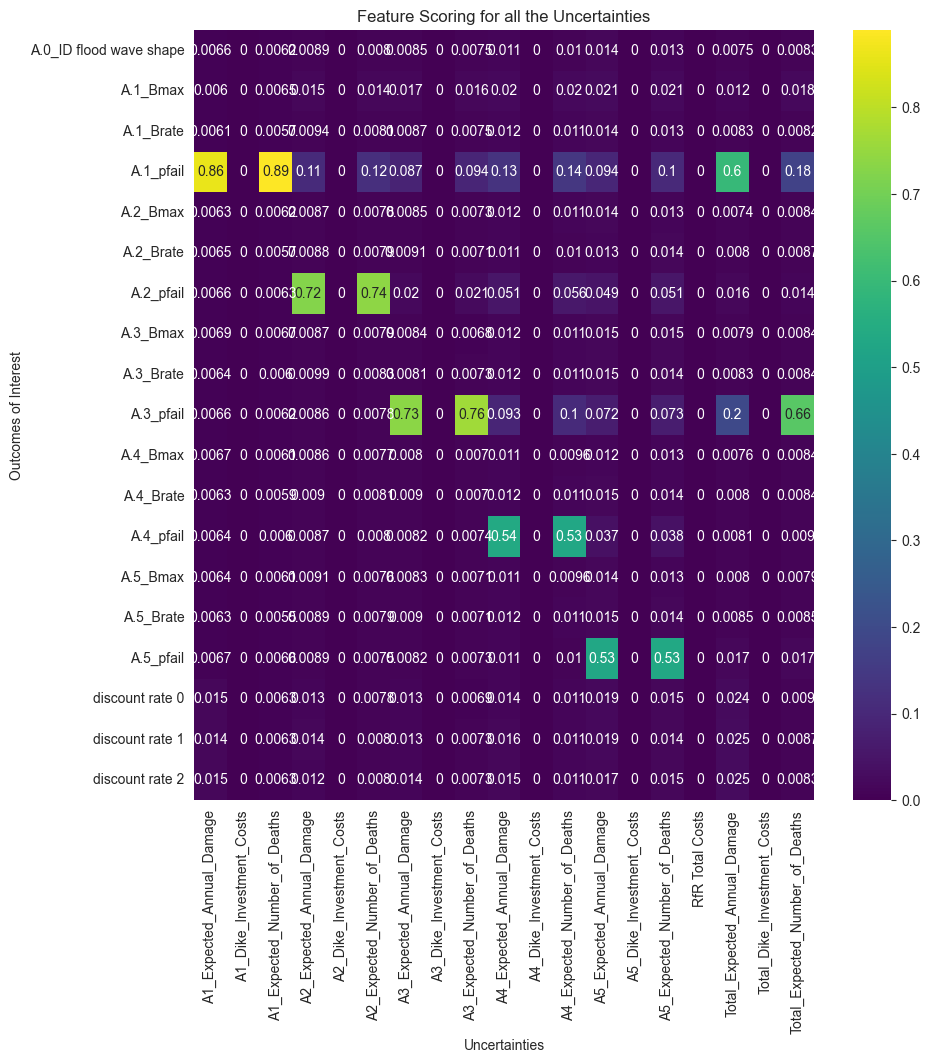

In [6]:
# All uncertainties
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(fs, cmap="viridis", annot=True, ax=ax)

#Graph setup
plt.title('Feature Scoring for all the Uncertainties')
plt.xlabel('Uncertainties')
plt.ylabel('Outcomes of Interest')
plt.savefig('./img/Feature_Scoring_Uncertainties.png')
plt.show()

------------------------

## 2. Dimensional Stacking

In the first step, Feature Scoring was employed to identify the most influential uncertainties, with the *probability that the dike will withstand the hydraulic load* (Ai_pfail) emerging as the most significant factor. However, to gain a more comprehensive understanding of how these uncertainties precisely impact the outcomes of interest, Dimensional Stacking was performed. The outcomes that were explored using Dimensional Stacking are the following:

* 2.1.1 Total Expected Number of Deaths
* 2.1.2 Total Expected Annual Damage

As a transport company, our primary concern is to ensure the operability and safety of our business operations along the entire IJssel River. Therefore, it is crucial to understand the total expected number of deaths and the total expected annual damage, as these factors significantly influence the continuity and reliability of our transport activities. By focusing on these outcomes, we aim to make informed decisions to mitigate risks and ensure the sustainable operation of our transport network.

For all the Dimensional Stacking runs, a threshold was set to limit the maximum value. Specifically, the threshold was set to retain approximately 68% of the total values, which corresponds to approximately one standard deviation.

In [7]:
# Use DataFrames for easier plotting
experiments= pd.DataFrame(experiments)
outcomes = pd.DataFrame(outcomes)

### 2.1.1  Number of Deaths in All Dikes

In [20]:
# Determine the threshold value for keeping 68% of the total values
# Calculate the number of values greater than ..
All_Dikes_Death = len(outcomes[outcomes["Total_Expected_Number_of_Deaths"] < 1.87770])

# Calculate the percentage      
percentage_All_Dikes_Death = ((All_Dikes_Death
                          / len(outcomes["Total_Expected_Number_of_Deaths"])
                         ) * 100)

# Print the result
print(f"The percentage is: {percentage_All_Dikes_Death:.2f}%")

The percentage is: 68.00%


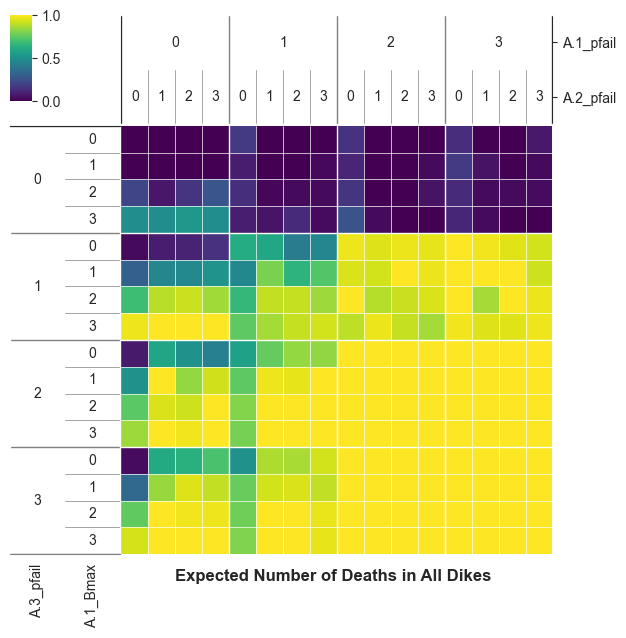

In [21]:
x = experiments
y = (outcomes["Total_Expected_Number_of_Deaths"] < 1.87770).to_numpy()  # Convert to numpy array

dimensional_stacking.create_pivot_plot(x, y, 2, nbins=4)
fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.title('Expected Number of Deaths in All Dikes', x=15, y=-5.7, fontweight='bold')
plt.savefig('./img/Dimensional_Stacking_Number_of_Deaths_All.png')
plt.show()

The pivot plot reveals the relationship between various uncertainties (A1_Bmax, A1_pfail, A2_pfail, and A3_pfail) and the expected number of deaths in all dikes. The color gradient indicates the density of outcomes below the threshold of 1.87770 deaths. Areas with higher densities (yellow regions) suggest that particular combinations of uncertainties, such as higher values of A3_pfail and A2_pfail, are associated with a greater expected number of deaths, highlighting critical areas where failure probabilities significantly impact overall mortality risk.

### 2.1.2 Expected Annual Damage in All Dikes

In [45]:
# Determine the threshold value for keeping 68% of the total values
# Calculate the number of values greater than ..
treshold = 2420320000
All_Dikes_Damages = len(outcomes[(outcomes["Total_Expected_Annual_Damage"] < treshold )])

# Calculate the percentage
percentage_All_Dikes_Damages = ((All_Dikes_Damages
                                 / len(outcomes["Total_Expected_Annual_Damage"])
                                ) * 100)

# Print the result
print(f"The percentage is: {percentage_All_Dikes_Damages:.2f}%")

The percentage is: 68.00%


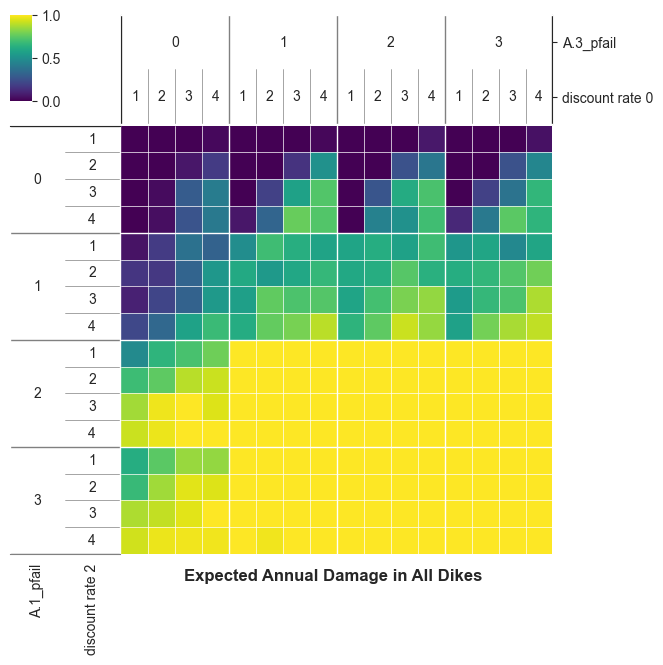

In [46]:
x = experiments
y = (outcomes["Total_Expected_Annual_Damage"] < treshold).to_numpy()

dimensional_stacking.create_pivot_plot(x, y, 2,nbins=4) 

fig = plt.gcf()
fig.set_size_inches(7, 7)

# Make the plot pretty
plt.title('Expected Annual Damage in All Dikes',
          x=15, y=-5.7, fontweight='bold')
# plt.savefig('./img/Dimensional_Stacking_Annual_Damage_DR4.png')
plt.show()

The plot demonstrates that higher probabilities of failure in dikes A3 (A3_pfail) and A1 (A1_pfail), combined with lower discount rates, are associated with significantly increased expected annual damage across all dikes, underscoring the importance of addressing these specific uncertainties to reduce overall financial risks.